# **Detecting and Handling Outliers with Pandas**

Data analysis is a long process. There are some steps to do this. First of all, we need to recognize the data. We have to know every feature in the dataset. Then we must detect the missing values and clear our dataset from these NaN values. We can fill these NaN values with some values (mean, median, etc.) or we can create our function to fill these missing values. We can also drop some columns that are not helpful or have more NaN values than others.

This process can change. It depends on the data and target. But we must finally fight the outliers. We have to detect and handle them. Each data has different types of outliers, whether they are within 1.5 IQR or not. Sometimes these outliers aren’t harmful, so we don’t deal with them. But if we want to get good results in models or our analysis, we need to handle outliers. There are 3 commonly used methods to deal with outliers.

1. Dropping the outliers.

2. Winsorize method.

3. Log transformation.

Let’s look at these methods with Python,

In this demo, we will use the Seaborn diamonds dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfo = sns.load_dataset('diamonds')
df = dfo.copy()
df = df.dropna()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df["table"]

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [4]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

We will handle the table feature of the diamonds dataset and assume all NaN values have been processed (we just dropped them). Let’s look at the graphs boxplot and histogram.

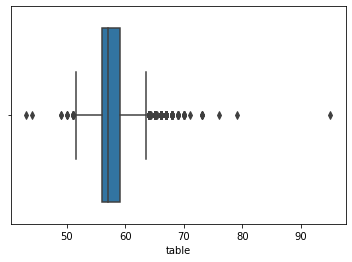

In [5]:
sns.boxplot(x=df["table"])
plt.show()

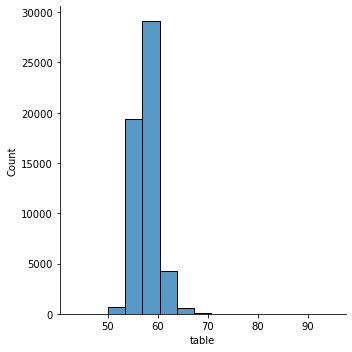

In [6]:
sns.displot(df["table"], bins=15, kde=False)
plt.show()

As you can see this column has outliers (it is shown at boxplot) and it is right-skewed data(it is easily seen at histogram). Boxplot is the best way to see outliers.

Before handling outliers, we will detect them. We will use Tukey’s rule to detect outliers (**Tukey's rule says that the outliers are values more than 1.5 times the interquartile range from the quartiles**). It is also known as the IQR rule. First, we will calculate the Interquartile Range of the data (IQR = Q3 — Q1). Later, we will determine our outlier boundaries with IQR.

**We will get our lower boundary with this calculation Q1–1.5 * IQR. We will get our upper boundary with this calculation Q3 + 1.5 * IQR.**

According to this rule, the data between boundaries are acceptable but the data outside of the between lower and upper boundaries are outliers. We can use 2.5 or 2 to detect IQR. It depends on our data and analysis. But the most commonly used is 1.5 and we will use 1.5 IQR in this analysis.


In [7]:
df["table"].describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

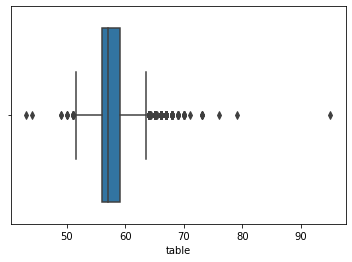

In [8]:
sns.boxplot(x=df["table"])
plt.show()

With the describe method of pandas, we can see our data’s Q1 (%25) and Q3 (%75) percentiles. We can calculate our IQR point and boundaries (with 1.5).

In [9]:
df["table"].describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [10]:
df["table"].quantile(0.25)

56.0

In [11]:
df["table"].quantile(0.75)

59.0

In [12]:
# almacenando valor de quantile 0.25
Q1 = df["table"].quantile(0.25)
print('El VALOR DEL CUANTIL 0.25 O EL PRIMER CUARTIL Q1 (ES LO MISMO) ES: ', Q1)

# almacenando valor de quantile 0.75
Q3 = df["table"].quantile(0.75)
print('El VALOR DEL CUANTIL 0.75 O EL TERCER CUARTIL Q3 (ES LO MISMO) ES: ', Q3)


El VALOR DEL CUANTIL 0.25 O EL PRIMER CUARTIL Q1 (ES LO MISMO) ES:  56.0
El VALOR DEL CUANTIL 0.75 O EL TERCER CUARTIL Q3 (ES LO MISMO) ES:  59.0


In [13]:
# calculo rango intercuartil
IQR = Q3 - Q1
print('El VALOR DEL RANGO INTERCUARTIL ES: ', IQR)

El VALOR DEL RANGO INTERCUARTIL ES:  3.0


In [14]:
# calculo limite inferior y limite superior (para identificar valores outliers segun la regla de tukey)
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [15]:
# limite inferior
print('EL VALOR DEL LIMITE INFERIOR ES: ', lower_lim)

EL VALOR DEL LIMITE INFERIOR ES:  51.5


In [16]:
# limite superior
print('EL VALOR DEL LIMITE SUPERIOR ES: ', upper_lim)

EL VALOR DEL LIMITE SUPERIOR ES:  63.5


**Our upper boundary is 63.5 and our lower boundary is 51.5. This means that these values between 51.5 and 63.5 are acceptable but those outside mean there are outliers. So we need to handle them because they corrupt our data.**

Let’s handle outliers.

## **1 — Dropping the outliers;**

We can easily remove outliers, but this narrows our data. If we have a lot of rows, big data, maybe we can take risks. But remember, if we drop the value, we delete all records (row). If we have vulnerable records, they can get lost.

In [17]:
df['table']

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [18]:
# almacena todos los datos de la columna en una
# variable booleana, siendo True todos aquellos que cumplen la condicion de
# ser menor que el limite inferior
outliers_15_low = (df['table'] < lower_lim)

In [19]:
# todos los True cumplen la condición de ser menor 
# que el limite inferior
print(outliers_15_low.to_string())

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

In [20]:
# 16 datos son menores que el limite inferior
outliers_15_low.value_counts() 

False    53924
True        16
Name: table, dtype: int64

In [21]:
print('EXISTEN 16 VALORES OUTLIERS, BAJO EL LIMITE INFERIOR')

EXISTEN 16 VALORES OUTLIERS, BAJO EL LIMITE INFERIOR


In [22]:
# almacena todos los datos de la columna en una
# variable booleana siendo True todos aquellos que cumplen la condicion de
# ser mayor que el limite superior
outliers_15_up = (df["table"] > upper_lim)

In [23]:
# todos los True cumplen la condición de ser mayor
# que el limite superior
outliers_15_up

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [24]:
# 589 datos son mayores que el limite superior
outliers_15_up.value_counts()

False    53351
True       589
Name: table, dtype: int64

In [25]:
print('EXISTEN 589 VALORES OUTLIERS, SOBRE EL LIMITE SUPERIOR.')

EXISTEN 589 VALORES OUTLIERS, SOBRE EL LIMITE SUPERIOR.


In [26]:
# imprime los outliers
# imprime los datos que cumplan la condición True de la varibable booleana outliers_15_low
df['table'][outliers_15_low]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [27]:
# imprime los outliers
# imprime los datos que cumplan la condición True de la varibable booleana outliers_15_up
df['table'][outliers_15_up]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 589, dtype: float64

In [28]:
# imprime la longitud o la cantidad de datos que cumplen la condicion True de la variable booleana outliers_15_low
len(df['table'][outliers_15_low])

16

In [29]:
# imprime la longitud o la cantidad de datos que cumplen la condicion True de la variable booleana outliers_15_up
len(df['table'][outliers_15_up])

589

In [30]:
# suma cantidad total datos outliers
total_outliers = len(df['table'][outliers_15_low]) + len(df['table'][outliers_15_up])
total_outliers

605

In [31]:
# cantidad total datos columna 'table'
len(df['table'])

53940

In [32]:
# cantidad total de datos sin datos outliers
len(df['table']) - total_outliers

53335

In [33]:
# imprime todos los datos outliers
print(df['table'][(outliers_15_low | outliers_15_up)].to_string())

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
239      64.0
296      66.0
314      70.0
356      66.0
359      68.0
461      64.0
504      64.0
526      67.0
712      67.0
771      65.0
777      70.0
868      64.0
919      69.0
929      65.0
932      64.0
1140     66.0
1196     64.0
1227     67.0
1275     67.0
1319     66.0
1422     64.0
1493     65.0
1498     66.0
1515     51.0
1524     67.0
1552     66.0
1598     66.0
1641     64.0
1880     65.0
1903     66.0
2071     65.0
2131     65.0
2143     64.0
2209     67.0
2232     65.0
2262     64.0
2272     66.0
2298     65.0
2443     68.0
2474     64.0
2504     64.0
2794     64.0
2857     65.0
2915     64.0
2926     66.0
3170     66.0
3236     66.0
3238     50.1
3392     64.0
3475     64.0
3595     64.0
3608     64.0
3808     64.0
3838     64.0
3885     65.0
3936     64.0
3957     64.0
3979     51.0
4090     64.0
4127     65.0
4150     51.0
4157     64.0
4212     64.0
4322     66.0
4327     64.0
4364     64.0
4472  

In [34]:
# imprime todos los datos validos (sin datos outiers)
df['table'][(~outliers_15_low | outliers_15_up)]

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53924, dtype: float64

We make some equations to reach outliers and index. As you can see, if we drop outliers, we will lose 605 records.Check the length of the tables. In the beginning, we had 53940 rows.

In [35]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [36]:
df = df[~(outliers_15_low | outliers_15_up)]
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


We removed the outliers and our data rows drop to 53335. After dropping outliers, let’s check the boxplot and histogram of our data.

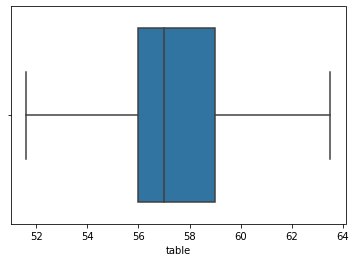

In [37]:
sns.boxplot(x=df['table'])
plt.show()

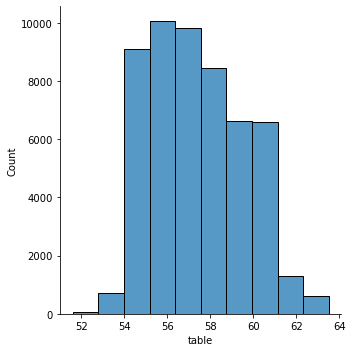

In [38]:
sns.displot(df['table'], bins=10, kde = False)
plt.show()

In [39]:
df.table.describe()

count    53335.000000
mean        57.373404
std          2.074349
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

Now, we don’t have any outliers.

## **2 — Winsorize Method;**

Our second method is the Winsorize Method. In the Winsorize Method, we limit outliers with an upper and lower limit. We will set the limits. We will make our upper and lower limits for data our new maximum and minimum points.

We will use the table column of the diamonds dataset again. Let’s check the boxplot again.

In [40]:
df = dfo.copy()

In [41]:
df['table']

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

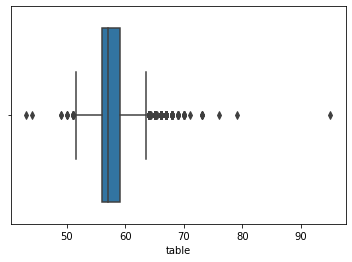

In [42]:
sns.boxplot(x = df['table'])
plt.show()

We have outliers, we detected them at the beginning. For outliers, our upper limit is 63.5 and our lower limit is 51.5.

For the Winsorize Method, we have to import winsorize from Scipy. We need boundaries to apply winsorize. **We will limit our data between 53 and 63. These values are within limits for outliers. We need precise points of these values in the percentile and we can use the quantile method of Pandas.**

In [43]:
from scipy.stats.mstats import winsorize

In [44]:
upper_lim

63.5

In [45]:
lower_lim

51.5

In [46]:
df['table'].quantile(0.01) 

53.0

In [47]:
df['table'].quantile(0.98)

63.0

We will create a new variable with Winsorize Method. To implement the Winsorize Method, we write the exact boundary points as a tuple on the percentile. For example, we will write (0.01, 0.02). This means we want to apply quantile(0.01) and quantile(0.98) as a boundary. The first one is the exact point on percentile from the beginning, the second one is exact point on percentile from the end.

In [48]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [49]:
df_table = df['table']
df_table


0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [65]:
# remplaza los primeros datos dentro del 1% por el valor de los datos en el percentil 1.
# remplaza los ultimos datos dentro del 2% por el valor de los datos en el percentil 98.
df_table_win = winsorize(df_table, (0.01, 0.02))
df_table_win

masked_array(data=[55., 61., 63., ..., 60., 58., 55.],
             mask=False,
       fill_value=1e+20)

In [51]:
df_win = pd.DataFrame(df_table_win)
df_win.describe()

,0
count,53940.000000
mean,57.434607
std,2.142774
min,53.000000
25%,56.000000
50%,57.000000
75%,59.000000
max,63.000000


<AxesSubplot:>

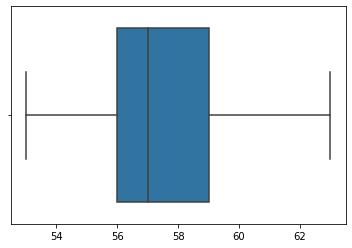

In [52]:
sns.boxplot(x = df_table_win)

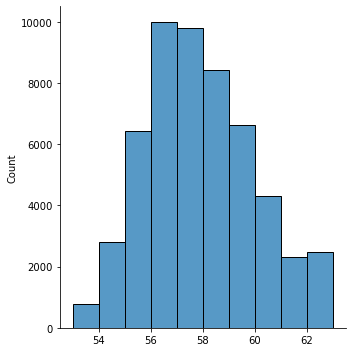

In [53]:
sns.displot(df_table_win,bins = 10, kde = False)

As you can see, there are no outliers. Focus on this, our maximum and minimum values on the boxplot; 53 and 63. We applied them as boundaries. Now, we can look at descriptive statistical values of old and new data with the describe method.

In [72]:
#df_t_win = pd.Series(df_table_win)
df_t_win = pd.DataFrame(df_table_win)[0]
df_t_win.describe()

count    53940.000000
mean        57.434607
std          2.142774
min         53.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.000000
Name: 0, dtype: float64

In [55]:
df['table'].describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

## **3 — Log Transformation;**

Our last method is Log Transformation. We use log transformation on skewed data. Log transformation reduces the skewness of data and tries to make it normal. Log transformation doesn’t always make it normal, sometimes makes data more skewed. So it depends on the data. We have to apply transformation and control the result.

For this method, we will use the carat column of diamonds dataset. Let’s check the data and graphs.

In [56]:
df = dfo.copy()

In [57]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [58]:
df['carat'].head()

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64

<AxesSubplot:xlabel='carat'>

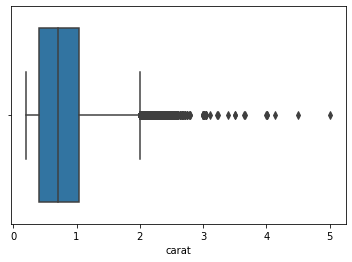

In [59]:
sns.boxplot(x = df['carat'])

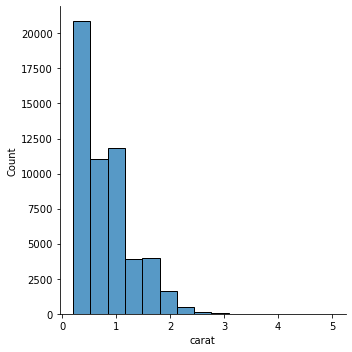

In [60]:
sns.displot(df['carat'],bins=15, kde = False)

There are many outliers and the data is right-skewed. Log transformation will transform data to normal or close to normal. Let’s apply the log transformation to reduce the variability of data.

In [61]:
import numpy as np

In [62]:
df['carat'].head()

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64

In [63]:
df_carat_log = np.log(df['carat'])
df_carat_log.head()

0   -1.469676
1   -1.560648
2   -1.469676
3   -1.237874
4   -1.171183
Name: carat, dtype: float64

<AxesSubplot:xlabel='carat'>

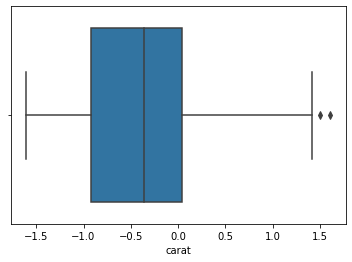

In [64]:
sns.boxplot(x =df_carat_log)

We implemented log transformation from NumPy with np.log. It completely changed our data and it removed outliers, we can see this in the boxplot.

Log transformation is commonly used for machine learning algorithms. **Be careful, it changes our values but removes outliers.** It makes our model normal and the machine learning algorithm likes normal distribution data. There are some methods and **features in machine learning algorithms such as scaling and normalization**. We will talk about these terms in our next stories.

**Conclusion**

It takes a long time to deal with outliers but it’s worth it. We have to choose the best method for the data. It is important to know the data very well. With this domain knowledge, we will decide on the method of handling outliers. Apart from these methods, we can consider these outliers as missing values. We can use the methods of filling missing values to get rid of outliers.



Referencia: https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8